# Changelog

## Version 6

* Fix all prediction is 0
* Ensemble model
* Use 3 epoch for each model

## Version 2

* Fix submission filename
* Remove unused code

## Version 1

* Initial Code

# Library

In [1]:
import os
import random
import platform
import itertools

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import fastai

In [2]:
!pip freeze > requirements.txt

In [3]:
print('Python version:', platform.python_version())
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Scikit-Learn version:', sklearn.__version__)
print('FastAI version:', sklearn.__version__)

Python version: 3.7.6
Numpy version: 1.18.5
Pandas version: 1.0.3
Matplotlib version: 3.2.1
Seaborn version: 0.10.0
Scikit-Learn version: 0.23.1
FastAI version: 0.23.1


In [4]:
SEED = 42

os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [5]:
pd.set_option('display.width', None)
pd.set_option('display.max_column', None)

# Processed Dataset

In [6]:
df_train = pd.read_parquet('/kaggle/input/shopee-marketing-data/train_processed.parquet')
df_train

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
0,4,2019-07-16 00:00:00+08:00,44,19.0,6.0,18.0,0,2,4,12,43,99,0,5,10,0,1.0,1.0,2.0,47.0,0.0
1,4,2019-07-16 00:00:00+08:00,44,9.0,4.0,8.0,2,9,17,18,48,90,1,1,4,1,1.0,1.0,2.0,25.0,3.0
2,6,2019-07-16 00:00:00+08:00,49,14.0,5.0,5.0,0,4,12,24,69,119,5,19,27,0,NaN,1.0,0.0,NaN,2.0
3,1,2019-07-16 00:00:00+08:00,49,49.0,9.0,53.0,0,0,1,9,23,69,1,3,6,0,1.0,1.0,2.0,24.0,2.0
4,6,2019-07-16 00:00:00+08:00,49,227.0,6.0,221.0,0,0,0,2,5,5,0,0,0,0,NaN,1.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,39,24.0,36.0,279.0,0,1,1,0,0,0,0,0,0,0,1.0,1.0,1.0,37.0,0.0
73535,2,2019-09-02 00:00:00+08:00,38,46.0,10.0,51.0,0,0,1,0,0,0,0,0,0,0,NaN,1.0,0.0,NaN,0.0
73536,2,2019-09-02 00:00:00+08:00,32,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,1.0,0.0,NaN,9.0
73537,2,2019-09-02 00:00:00+08:00,38,5.0,34.0,NaN,2,4,4,0,0,0,0,0,0,1,NaN,1.0,0.0,NaN,0.0


In [7]:
df_test = pd.read_parquet('/kaggle/input/shopee-marketing-data/test_processed.parquet')
df_test

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
0,6,2019-09-03 00:00:00+08:00,35,27.0,2.0,13.0,2,3,4,10,34,134,0,6,18,NaN,1.0,0.0,NaN,0.0
1,6,2019-09-03 00:00:00+08:00,35,7.0,5.0,383.0,1,1,1,5,5,5,0,0,0,NaN,1.0,0.0,NaN,0.0
2,5,2019-09-03 00:00:00+08:00,25,34.0,1.0,3.0,0,0,0,13,19,38,2,2,2,1.0,1.0,2.0,33.0,0.0
3,1,2019-09-03 00:00:00+08:00,36,63.0,5.0,5.0,0,0,0,43,110,173,2,5,5,1.0,1.0,2.0,22.0,2.0
4,5,2019-09-03 00:00:00+08:00,23,6.0,5.0,54.0,0,0,0,4,12,39,0,0,2,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,53,NaN,4.0,8.0,0,0,0,0,0,0,0,0,0,NaN,1.0,0.0,NaN,3.0
55966,6,2019-09-29 00:00:00+08:00,53,59.0,802.0,1207.0,0,0,1,0,0,0,0,0,0,NaN,1.0,0.0,NaN,0.0
55967,6,2019-09-29 00:00:00+08:00,43,NaN,7.0,NaN,0,0,0,0,0,0,0,0,0,NaN,1.0,0.0,NaN,0.0
55968,6,2019-09-29 00:00:00+08:00,43,5.0,5.0,6.0,2,5,14,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


# EDA

In [8]:
df_train.describe()

,country_code,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
count,73539.000000,73539.000000,66021.00000,73260.000000,56634.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,45758.000000,73287.000000,73518.000000,45758.000000,73518.000000
mean,2.533159,43.656373,32.75323,53.335695,73.645725,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,0.999847,0.997912,1.087230,31.348464,0.434166
std,1.675251,11.219323,55.16675,345.223999,129.415239,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,0.012368,0.045644,1.033832,11.584066,1.259629
min,1.000000,10.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000
25%,1.000000,34.000000,5.00000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,24.000000,0.000000
50%,2.000000,43.000000,14.00000,8.000000,22.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,0.000000
75%,3.000000,52.000000,38.00000,26.000000,77.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,2.000000,36.000000,0.000000
max,7.000000,75.000000,808.00000,18141.000000,1445.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,1.000000,1.000000,4.000000,118.000000,10.000000


In [9]:
df_test.describe()

,country_code,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
count,55970.000000,55970.000000,48381.000000,55801.000000,44567.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,34254.000000,55731.000000,55951.000000,34254.000000,55951.000000
mean,2.835215,42.212703,32.641078,47.723607,69.409743,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,0.999796,0.998152,1.070347,31.404099,0.444407
std,1.728489,12.276136,52.263247,276.075845,126.579497,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,0.014294,0.042951,1.036071,11.609694,1.298730
min,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000
25%,1.000000,35.000000,6.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,24.000000,0.000000
50%,3.000000,41.000000,18.000000,8.000000,19.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,29.000000,0.000000
75%,4.000000,48.000000,40.000000,23.000000,69.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,1.000000,1.000000,2.000000,36.000000,0.000000
max,7.000000,79.000000,812.000000,18165.000000,1462.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,1.000000,1.000000,4.000000,118.000000,10.000000


In [10]:
df_train.isnull().sum()

country_code                       0
grass_date                         0
subject_line_length                0
last_open_day                   7518
last_login_day                   279
last_checkout_day              16905
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
open_flag                          0
attr_1                         27781
attr_2                           252
attr_3                            21
age                            27781
domain                            21
dtype: int64

In [11]:
df_test.isnull().sum()

country_code                       0
grass_date                         0
subject_line_length                0
last_open_day                   7589
last_login_day                   169
last_checkout_day              11403
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
attr_1                         21716
attr_2                           239
attr_3                            19
age                            21716
domain                            19
dtype: int64

## Age

In [12]:
print('Train dataset!')
print('Total data with age below 13:', df_train['age'][df_train['age'] < 13].count())
print('Total data with age below 18:', df_train['age'][df_train['age'] < 18].count())
print('Total data with age 70 or more:', df_train['age'][df_train['age'] >= 70].count())
print('Total data with age 100 or more:', df_train['age'][df_train['age'] >= 100].count())

print('Test dataset!')
print('Total data with age below 13:', df_test['age'][df_test['age'] < 13].count())
print('Total data with age below 18:', df_test['age'][df_test['age'] < 18].count())
print('Total data with age 70 or more:', df_test['age'][df_test['age'] >= 70].count())
print('Total data with age 100 or more:', df_test['age'][df_test['age'] >= 100].count())

Train dataset!
Total data with age below 13: 326
Total data with age below 18: 962
Total data with age 70 or more: 343
Total data with age 100 or more: 286
Test dataset!
Total data with age below 13: 215
Total data with age below 18: 758
Total data with age 70 or more: 253
Total data with age 100 or more: 217


## last_login_day & last_checkout_day

In [13]:
df_train[ df_train['last_login_day'].isnull() & ~df_train['last_checkout_day'].isnull() ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
7022,1,2019-07-21 00:00:00+08:00,40,NaN,NaN,66.0,0,0,0,37,92,122,0,0,0,0,1.0,1.0,4.0,43.0,3.0
12170,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,43.0,0,0,0,1,2,7,0,0,1,0,1.0,NaN,2.0,28.0,2.0
12173,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,443.0,0,0,0,0,1,6,0,0,0,0,1.0,NaN,2.0,29.0,0.0
12175,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,5.0,0,0,0,18,47,93,3,13,18,0,1.0,NaN,2.0,27.0,2.0
12177,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,1.0,2,2,3,9,29,62,4,11,17,1,1.0,NaN,2.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42788,4,2019-08-14 00:00:00+08:00,33,NaN,NaN,101.0,1,1,1,42,142,289,0,0,0,0,1.0,1.0,1.0,31.0,0.0
50177,7,2019-08-19 00:00:00+08:00,69,NaN,NaN,73.0,0,0,0,0,3,18,0,0,0,0,1.0,1.0,2.0,31.0,0.0
52770,1,2019-08-20 00:00:00+08:00,68,NaN,NaN,14.0,0,0,1,52,153,277,0,2,3,0,1.0,1.0,1.0,25.0,0.0
54478,3,2019-08-21 00:00:00+08:00,23,NaN,NaN,55.0,0,4,7,0,0,15,0,0,1,0,NaN,1.0,0.0,NaN,0.0


In [14]:
df_test[ df_test['last_login_day'].isnull() & ~df_test['last_checkout_day'].isnull() ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
20896,3,2019-09-09 00:00:00+08:00,41,NaN,NaN,3.0,0,0,1,8,28,48,3,7,11,1.0,1.0,1.0,36.0,2.0
38884,6,2019-09-16 00:00:00+08:00,20,NaN,NaN,16.0,1,2,6,54,151,309,0,0,0,NaN,1.0,0.0,NaN,0.0
48025,6,2019-09-23 00:00:00+08:00,30,NaN,NaN,3.0,0,0,2,0,0,0,0,0,0,1.0,1.0,2.0,29.0,2.0
49559,6,2019-09-24 00:00:00+08:00,20,NaN,NaN,54.0,0,0,0,17,82,225,0,0,1,1.0,1.0,2.0,19.0,0.0
51541,6,2019-09-25 00:00:00+08:00,54,NaN,NaN,36.0,1,4,6,0,0,0,0,0,0,1.0,0.0,1.0,26.0,0.0


## last_open_day && open_count_last_{}_days

In [15]:
df_train[ df_train['last_open_day'].isnull() & ((df_train['open_count_last_10_days'] > 0) | (df_train['open_count_last_30_days'] > 0) | (df_train['open_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
667,1,2019-07-16 00:00:00+08:00,58,NaN,14.0,19.0,1,1,1,0,15,18,0,1,1,0,NaN,1.0,0.0,NaN,0.0
1011,2,2019-07-16 00:00:00+08:00,36,NaN,196.0,45.0,0,2,2,0,0,2,0,0,4,0,1.0,1.0,1.0,29.0,0.0
1132,2,2019-07-16 00:00:00+08:00,36,NaN,15.0,15.0,1,1,1,0,0,0,0,0,0,1,1.0,1.0,2.0,27.0,0.0
1287,5,2019-07-16 00:00:00+08:00,43,NaN,94.0,197.0,2,2,2,0,0,0,0,0,0,0,1.0,1.0,2.0,31.0,0.0
1321,2,2019-07-16 00:00:00+08:00,36,NaN,348.0,NaN,0,2,2,0,0,0,0,0,0,0,1.0,1.0,2.0,27.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73228,1,2019-09-02 00:00:00+08:00,33,NaN,27.0,NaN,2,2,2,0,2,2,0,0,0,1,NaN,1.0,0.0,NaN,0.0
73269,1,2019-09-02 00:00:00+08:00,33,NaN,27.0,NaN,2,2,2,0,1,1,0,0,0,0,NaN,1.0,0.0,NaN,0.0
73363,1,2019-09-02 00:00:00+08:00,33,NaN,14.0,NaN,0,1,1,0,5,5,0,0,0,0,NaN,1.0,0.0,NaN,0.0
73415,3,2019-09-02 00:00:00+08:00,49,NaN,3.0,NaN,1,1,1,8,17,17,0,0,0,0,1.0,1.0,1.0,1.0,0.0


In [16]:
df_test[ df_test['last_open_day'].isnull() & ((df_test['open_count_last_10_days'] > 0) | (df_test['open_count_last_30_days'] > 0) | (df_test['open_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
3080,1,2019-09-03 00:00:00+08:00,36,NaN,2.0,2.0,0,1,1,42,77,77,11,13,13,1.0,1.0,1.0,20.0,0.0
3085,6,2019-09-03 00:00:00+08:00,35,NaN,1.0,7.0,1,1,1,4,5,5,2,2,2,1.0,1.0,2.0,22.0,0.0
3106,1,2019-09-03 00:00:00+08:00,43,NaN,13.0,NaN,1,1,1,1,17,17,0,0,0,NaN,1.0,0.0,NaN,0.0
3133,1,2019-09-03 00:00:00+08:00,43,NaN,11.0,26.0,2,2,2,3,21,21,0,1,1,NaN,1.0,0.0,NaN,0.0
3215,1,2019-09-03 00:00:00+08:00,43,NaN,11.0,14.0,1,1,1,2,10,10,0,3,3,1.0,1.0,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54302,6,2019-09-27 00:00:00+08:00,21,NaN,NaN,NaN,3,7,8,0,0,0,0,0,0,1.0,1.0,1.0,29.0,0.0
55202,3,2019-09-28 00:00:00+08:00,38,NaN,2.0,4.0,1,1,1,37,56,56,1,2,2,NaN,1.0,0.0,NaN,0.0
55916,3,2019-09-29 00:00:00+08:00,50,NaN,15.0,NaN,3,6,6,0,6,6,0,0,0,NaN,1.0,0.0,NaN,0.0
55924,3,2019-09-29 00:00:00+08:00,43,NaN,5.0,NaN,2,2,2,1,8,8,0,0,0,1.0,1.0,3.0,30.0,0.0


## last_login_day && login_count_last_{}_days

In [17]:
df_train[ df_train['last_login_day'].isnull() & ((df_train['login_count_last_10_days'] > 0) | (df_train['login_count_last_30_days'] > 0) | (df_train['login_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
7022,1,2019-07-21 00:00:00+08:00,40,NaN,NaN,66.0,0,0,0,37,92,122,0,0,0,0,1.0,1.0,4.0,43.0,3.0
11759,3,2019-07-23 00:00:00+08:00,47,NaN,NaN,NaN,0,0,0,0,0,2,0,0,0,1,NaN,1.0,0.0,NaN,2.0
12170,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,43.0,0,0,0,1,2,7,0,0,1,0,1.0,NaN,2.0,28.0,2.0
12173,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,443.0,0,0,0,0,1,6,0,0,0,0,1.0,NaN,2.0,29.0,0.0
12175,4,2019-07-24 00:00:00+08:00,53,NaN,NaN,5.0,0,0,0,18,47,93,3,13,18,0,1.0,NaN,2.0,27.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50177,7,2019-08-19 00:00:00+08:00,69,NaN,NaN,73.0,0,0,0,0,3,18,0,0,0,0,1.0,1.0,2.0,31.0,0.0
52770,1,2019-08-20 00:00:00+08:00,68,NaN,NaN,14.0,0,0,1,52,153,277,0,2,3,0,1.0,1.0,1.0,25.0,0.0
53971,2,2019-08-21 00:00:00+08:00,38,NaN,NaN,NaN,0,1,6,2,17,25,0,17,18,0,NaN,1.0,0.0,NaN,0.0
54478,3,2019-08-21 00:00:00+08:00,23,NaN,NaN,55.0,0,4,7,0,0,15,0,0,1,0,NaN,1.0,0.0,NaN,0.0


In [18]:
df_test[ df_test['last_login_day'].isnull() & ((df_test['login_count_last_10_days'] > 0) | (df_test['login_count_last_30_days'] > 0) | (df_test['login_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
20896,3,2019-09-09 00:00:00+08:00,41,NaN,NaN,3.0,0,0,1,8,28,48,3,7,11,1.0,1.0,1.0,36.0,2.0
30797,6,2019-09-11 00:00:00+08:00,20,NaN,NaN,NaN,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,33.0,0.0
31043,6,2019-09-11 00:00:00+08:00,20,NaN,NaN,NaN,0,0,0,13,41,76,0,0,0,NaN,1.0,0.0,NaN,0.0
31332,6,2019-09-11 00:00:00+08:00,20,NaN,NaN,NaN,0,0,0,0,1,2,0,0,0,1.0,1.0,1.0,22.0,0.0
31765,6,2019-09-11 00:00:00+08:00,20,NaN,NaN,NaN,0,0,1,21,69,142,0,0,0,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54095,6,2019-09-27 00:00:00+08:00,21,NaN,NaN,NaN,0,1,3,13,40,93,0,0,0,1.0,1.0,2.0,22.0,3.0
54147,6,2019-09-27 00:00:00+08:00,21,NaN,NaN,NaN,1,2,7,5,23,57,0,0,0,NaN,1.0,0.0,NaN,3.0
54155,6,2019-09-27 00:00:00+08:00,21,NaN,NaN,NaN,0,0,0,0,0,7,0,0,0,NaN,1.0,0.0,NaN,9.0
54293,6,2019-09-27 00:00:00+08:00,21,NaN,NaN,NaN,2,2,2,13,13,13,0,0,0,1.0,1.0,1.0,29.0,0.0


## last_login_day && login_count_last_{}_days

In [19]:
df_train[ df_train['last_checkout_day'].isnull() & ((df_train['checkout_count_last_10_days'] > 0) | (df_train['checkout_count_last_30_days'] > 0) | (df_train['checkout_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,attr_1,attr_2,attr_3,age,domain
405,1,2019-07-16 00:00:00+08:00,58,4.0,38.0,NaN,6,15,29,4,25,52,0,0,3,0,1.0,1.0,2.0,24.0,0.0
688,1,2019-07-16 00:00:00+08:00,64,83.0,4.0,NaN,0,0,0,35,126,273,0,3,14,0,1.0,1.0,1.0,33.0,0.0
705,2,2019-07-16 00:00:00+08:00,36,3.0,95.0,NaN,11,18,23,1,8,54,0,0,7,1,NaN,1.0,0.0,NaN,0.0
738,3,2019-07-16 00:00:00+08:00,33,7.0,37.0,NaN,1,5,10,1,1,6,0,0,1,0,1.0,1.0,2.0,27.0,0.0
841,1,2019-07-16 00:00:00+08:00,49,22.0,6.0,NaN,0,1,2,7,19,48,2,10,24,0,1.0,1.0,2.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73371,1,2019-09-02 00:00:00+08:00,33,NaN,14.0,NaN,0,0,0,1,7,7,0,2,2,0,NaN,1.0,0.0,NaN,0.0
73412,1,2019-09-02 00:00:00+08:00,33,NaN,2.0,NaN,0,0,0,17,29,29,0,1,1,0,NaN,1.0,0.0,NaN,0.0
73449,2,2019-09-02 00:00:00+08:00,38,14.0,2.0,NaN,0,0,0,7,20,20,0,1,1,0,1.0,1.0,1.0,29.0,0.0
73454,1,2019-09-02 00:00:00+08:00,33,13.0,1.0,NaN,0,0,0,11,20,20,26,49,49,0,1.0,1.0,2.0,50.0,2.0


In [20]:
df_test[ df_test['last_checkout_day'].isnull() & ((df_test['checkout_count_last_10_days'] > 0) | (df_test['checkout_count_last_30_days'] > 0) | (df_test['checkout_count_last_60_days'] > 0)) ]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
863,1,2019-09-03 00:00:00+08:00,43,201.0,9.0,NaN,0,0,0,1,4,4,0,1,1,1.0,1.0,1.0,31.0,0.0
1528,2,2019-09-03 00:00:00+08:00,43,4.0,9.0,NaN,1,3,9,2,5,19,0,0,7,1.0,1.0,2.0,50.0,0.0
1980,1,2019-09-03 00:00:00+08:00,43,10.0,22.0,NaN,0,0,2,0,5,18,0,0,1,1.0,1.0,1.0,19.0,0.0
2239,3,2019-09-03 00:00:00+08:00,28,NaN,9.0,NaN,0,0,0,11,40,64,0,1,2,NaN,1.0,0.0,NaN,0.0
2242,3,2019-09-03 00:00:00+08:00,46,18.0,3.0,NaN,0,2,3,4,13,16,0,0,1,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55895,6,2019-09-29 00:00:00+08:00,43,11.0,7.0,NaN,0,3,3,7,26,28,0,3,3,NaN,1.0,0.0,NaN,0.0
55901,3,2019-09-29 00:00:00+08:00,43,NaN,4.0,NaN,0,0,0,4,9,9,1,1,1,1.0,1.0,1.0,20.0,0.0
55923,3,2019-09-29 00:00:00+08:00,43,NaN,7.0,NaN,0,0,0,22,41,41,1,2,2,NaN,1.0,0.0,NaN,0.0
55936,1,2019-09-29 00:00:00+08:00,48,NaN,17.0,NaN,0,0,0,4,15,15,0,1,1,NaN,1.0,0.0,NaN,0.0


# Additional preprocessing

## 1. Timedate

In [21]:
df_train['day'] = pd.to_datetime(df_train['grass_date']).dt.dayofweek.astype('category')
df_test['day'] = pd.to_datetime(df_test['grass_date']).dt.dayofweek.astype('category')

In [22]:
del df_train['grass_date']
del df_test['grass_date']

## 2. ~~Normalization~~ Standardization

In [23]:
# from sklearn.preprocessing import StandardScaler

# cont_feature = [
#     'subject_line_length', 'last_open_day', 'last_login_day', 'last_checkout_day',
#     'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
#     'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
#     'checkout_count_last_10_days', 'checkout_count_last_30_days',
#     'checkout_count_last_60_days', 'age'
# ]

# scaler = StandardScaler()
# df_train[cont_feature] = scaler.fit_transform(df_train[cont_feature])
# df_test[cont_feature] = scaler.transform(df_test[cont_feature])

## 3. Anomaly

In [24]:
def fix_age(age):
    if age < 18 or age >= 100:
        return np.nan
    else:
        return age
    
df_train['age'] = df_train['age'].apply(fix_age)
df_test['age'] = df_test['age'].apply(fix_age)

## 4. NaN

In [25]:
# # last_open_day
NAN_DEFAULT_INT = -9999
# df_train['last_open_day_nan'] = df_train['last_open_day'].isnull()
df_train['last_open_day'] = df_train['last_open_day'].fillna(NAN_DEFAULT_INT)

# df_test['last_open_day_nan'] = df_test['last_open_day'].isnull()
df_test['last_open_day'] = df_test['last_open_day'].fillna(NAN_DEFAULT_INT)

# # last_login_day
# df_train['last_login_day_nan'] = df_train['last_login_day'].isnull()
df_train['last_login_day'] = df_train['last_login_day'].fillna(NAN_DEFAULT_INT)

# df_test['last_login_day_nan'] = df_test['last_login_day'].isnull()
df_test['last_login_day'] = df_test['last_login_day'].fillna(NAN_DEFAULT_INT)

# # last_checkout_day
# df_train['last_checkout_day_nan'] = df_train['last_checkout_day'].isnull()
df_train['last_checkout_day'] = df_train['last_checkout_day'].fillna(NAN_DEFAULT_INT)

# df_test['last_checkout_day_nan'] = df_test['last_checkout_day'].isnull()
df_test['last_checkout_day'] = df_test['last_checkout_day'].fillna(NAN_DEFAULT_INT)

# # attr_1
# df_train['attr_1_nan'] = df_train['attr_1'].isnull()
# df_train['attr_1'] = df_train['attr_1'].fillna(NAN_DEFAULT_INT)

# df_test['attr_1_nan'] = df_test['attr_1'].isnull()
# df_test['attr_1'] = df_test['attr_1'].fillna(NAN_DEFAULT_INT)

# # attr_2
# df_train['attr_2_nan'] = df_train['attr_2'].isnull()
# df_train['attr_2'] = df_train['attr_2'].fillna(NAN_DEFAULT_INT)

# df_test['attr_2_nan'] = df_test['attr_2'].isnull()
# df_test['attr_2'] = df_test['attr_2'].fillna(NAN_DEFAULT_INT)

# # attr_3
# df_train['attr_3_nan'] = df_train['attr_3'].isnull()
# df_train['attr_3'] = df_train['attr_3'].fillna(NAN_DEFAULT_INT)

# df_test['attr_3_nan'] = df_test['attr_3'].isnull()
# df_test['attr_3'] = df_test['attr_3'].fillna(NAN_DEFAULT_INT)

# # age
# df_train['age_nan'] = df_train['age'].isnull()
df_train['age'] = df_train['age'].fillna(NAN_DEFAULT_INT)

# df_test['age_nan'] = df_test['age'].isnull()
df_test['age'] = df_test['age'].fillna(NAN_DEFAULT_INT)

In [26]:
# domain
# 1 -> 'other' domain from previous preprocessing
# df_train['domain_nan'] = df_train['domain'].isnull()
df_train['domain'] = df_train['domain'].fillna(1)

# df_test['domain_nan'] = df_test['domain'].isnull()
df_test['domain'] = df_test['domain'].fillna(1)

## 5. Misc

In [27]:
X = df_train.copy()
del X['open_flag']

X_test = df_test.copy()

y = df_train['open_flag'].to_numpy()

In [28]:
cat_feature = [
    'country_code','attr_1', 'attr_2', 'attr_3',
    'domain', 'day'
    #'last_open_day_nan', 'last_login_day_nan',
    #'last_checkout_day_nan', 'attr_1_nan', 'attr_2_nan',
    #'attr_3_nan', 'age_nan', 'domain_nan',
]
cat_feature_idx = [X.columns.get_loc(ct) for ct in cat_feature]
cat_feature_idx

[0, 14, 15, 16, 18, 19]

In [29]:
cont_feature = X.columns
cont_feature = [cf for cf in cont_feature if cf not in cat_feature]
cont_feature

['subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'age']

# KFold Model

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef
from fastai.tabular import *

K = 5

## LR Find

In [31]:
procs = [Categorify, Normalize]
# data_train = (TabularList.from_df(df_train, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
#    .split_by_idx(valid_idx)
#    .label_from_df(cols=dep_var, label_cls=FloatList)
#    .databunch()
#              )
data = TabularDataBunch.from_df(
    path='.', df=df_train, 
    dep_var='open_flag', 
    valid_idx=[], 
    cat_names=cat_feature, 
    cont_names=cont_feature, 
    procs=procs,
    test_df=X_test
)

learn = tabular_learner(data, layers=[100,50], metrics=accuracy, ps=[0.3, 0.3], emb_drop=0.3)
learn.lr_find(end_lr = 3e-1, stop_div=False, num_it=1000)

/opt/conda/lib/python3.7/site-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.86E-03
Min loss divided by 10: 5.09E-03


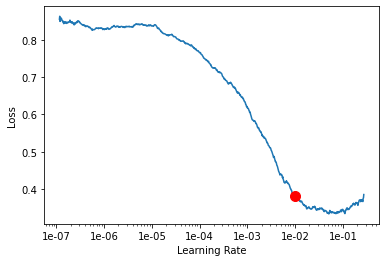

In [32]:
learn.recorder.plot(suggestion=True)

In [33]:
learn.recorder.min_grad_lr

0.009859627044299341

## Param

In [34]:
X_test.shape[1]

20

In [35]:
param_dict = {
    'layers': [
        [int(X_test.shape[1] * 0.75), int(X_test.shape[1] * 0.375)],
        [int(X_test.shape[1] * 2), int(X_test.shape[1] * 1)],
        [int(X_test.shape[1] * 5), int(X_test.shape[1] * 2.5)],
    ],
    'ps': [
        [0.1, 0.1],
        [0.3, 0.1],
        [0.3, 0.3],
    ],
    'emb_drop': [
        0.10,
        0.30
    ],
}
param_key = list(param_dict.keys())
param_item = list(param_dict.values())
param_item



[[[15, 7], [40, 20], [100, 50]],
 [[0.1, 0.1], [0.3, 0.1], [0.3, 0.3]],
 [0.1, 0.3]]

In [36]:
param_list = list(itertools.product(*param_item))
param_list[:10]

[([15, 7], [0.1, 0.1], 0.1),
 ([15, 7], [0.1, 0.1], 0.3),
 ([15, 7], [0.3, 0.1], 0.1),
 ([15, 7], [0.3, 0.1], 0.3),
 ([15, 7], [0.3, 0.3], 0.1),
 ([15, 7], [0.3, 0.3], 0.3),
 ([40, 20], [0.1, 0.1], 0.1),
 ([40, 20], [0.1, 0.1], 0.3),
 ([40, 20], [0.3, 0.1], 0.1),
 ([40, 20], [0.3, 0.1], 0.3)]

In [37]:
len(param_list)

18

## Train

In [38]:
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

model = []

for param in param_list:
    ctr_kfold = 0
    for train_idx, val_idx in skf.split(X, y):
        procs = [Categorify, Normalize]
        data = TabularDataBunch.from_df(
            path='.', df=df_train, 
            dep_var='open_flag', 
            valid_idx=val_idx,
            cat_names=cat_feature, 
            cont_names=cont_feature, 
            procs=procs,
            test_df=X_test
        )

        learn = tabular_learner(data, layers=param[0], metrics=accuracy, ps=param[1], emb_drop=param[2])
        learn.fit_one_cycle(3, 7.49E-03)
        learn.save(f'model_{str(ctr_kfold)}_{param[0]}_{param[1]}_{param[2]}')

        model.append(learn)
        ctr_kfold += 1

epoch,train_loss,valid_loss,accuracy,time
0,0.302200,0.295177,0.885572,00:11
1,0.305833,0.291285,0.886048,00:12
2,0.297787,0.289854,0.886932,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.306957,0.300170,0.881629,00:12
1,0.309739,0.293919,0.888496,00:11
2,0.296304,0.292352,0.888428,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.315958,0.298993,0.886184,00:14
1,0.296299,0.293713,0.885708,00:13
2,0.296080,0.294050,0.884825,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.303727,0.295937,0.885369,00:12
1,0.297448,0.292499,0.886660,00:12
2,0.296347,0.290660,0.886932,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.305596,0.302386,0.883049,00:11
1,0.297847,0.295706,0.885905,00:12
2,0.305386,0.294950,0.885497,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.303177,0.292798,0.888360,00:12
1,0.302369,0.291535,0.887068,00:13
2,0.296661,0.290768,0.887612,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.312580,0.296019,0.887612,00:12
1,0.311036,0.292197,0.887816,00:12
2,0.301282,0.291281,0.889244,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.300701,0.297934,0.885436,00:12
1,0.291186,0.293388,0.886252,00:11
2,0.302400,0.295949,0.885301,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.309876,0.293293,0.886592,00:11
1,0.294159,0.290104,0.887680,00:14
2,0.300530,0.289645,0.887000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.325015,0.300825,0.880669,00:11
1,0.305961,0.297682,0.884205,00:13
2,0.296674,0.294788,0.885769,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.316002,0.293416,0.887204,00:12
1,0.311011,0.295045,0.887204,00:12
2,0.290667,0.291734,0.887000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.317589,0.301039,0.886184,00:13
1,0.298191,0.294443,0.888972,00:14
2,0.295248,0.290879,0.889652,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.314430,0.299325,0.884893,00:12
1,0.304664,0.294501,0.886728,00:12
2,0.298182,0.293519,0.887748,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.313824,0.293696,0.886728,00:11
1,0.297639,0.288854,0.886932,00:13
2,0.309158,0.289585,0.887952,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.323913,0.301195,0.883253,00:12
1,0.303872,0.296279,0.884477,00:15
2,0.310675,0.295980,0.885157,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.320689,0.295066,0.887952,00:14
1,0.308107,0.293645,0.886524,00:12
2,0.309695,0.291764,0.887000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.311468,0.294903,0.888972,00:13
1,0.316583,0.294933,0.887544,00:13
2,0.315915,0.291478,0.889380,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.322388,0.302161,0.882921,00:13
1,0.300640,0.297577,0.884893,00:13
2,0.319878,0.295057,0.886524,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.325948,0.298075,0.885301,00:12
1,0.312369,0.291085,0.886796,00:14
2,0.296236,0.290246,0.887000,00:14


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.299856,0.294928,0.889040,00:15
1,0.293436,0.291339,0.890128,00:16
2,0.295769,0.288993,0.889652,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.309074,0.304455,0.883125,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.317508,0.290618,0.888428,00:14
1,0.307911,0.291402,0.886728,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.315930,0.292990,0.885844,00:15
1,0.299753,0.288850,0.888020,00:16
2,0.303554,0.288968,0.888020,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.313428,0.299460,0.883933,00:14
1,0.310498,0.297797,0.884545,00:13
2,0.299412,0.294973,0.885633,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.304877,0.296929,0.887068,00:16
1,0.302422,0.291737,0.886932,00:14
2,0.307790,0.292029,0.887476,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.300728,0.311959,0.873674,00:16
1,0.299353,0.290905,0.889312,00:16
2,0.291846,0.291568,0.889652,00:14


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.309135,0.298517,0.886796,00:18
1,0.302473,0.290144,0.887340,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.304880,0.297118,0.885572,00:16
1,0.306919,0.293016,0.888768,00:17
2,0.300183,0.291502,0.887068,00:17


epoch,train_loss,valid_loss,accuracy,time


# Evaluate

In [39]:
X_test.shape

(55970, 20)

In [40]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, precision_score, matthews_corrcoef

def predict(mode='ensemble_mode'):
    if mode == 'ensemble_mode':
        # buggy, all result is 0
        y_preds = np.empty((len(model), X_test.shape[0]))
        for i in range(len(model)):
            y_preds[i] = np.array([int(i) for i in model[i].get_preds(ds_type=DatasetType.Test)[1]])
        y_preds = np.array(y_preds)
        y_preds = scipy.stats.mode(y_preds)
        y_preds = y_preds[0]
        y_preds = y_preds.reshape(-1)
    elif mode == 'ensemble_mean':
        y_preds = np.empty((len(model), X_test.shape[0], 2))
        for i in range(len(model)):
            y_preds[i] = np.array([[float(i[0]), float(i[1])] for i in model[i].get_preds(ds_type=DatasetType.Test)[0]])
        y_preds = np.mean(y_preds, axis=0)
        y_preds = np.argmax(y_preds, axis=-1)
    else:
        raise KeyError("Mode isn't supported")
    
    return [int(i) for i in list(model[0].data.valid_ds.y)], y_preds

def metrics(y_true, y_pred):
    print('Weighted F1 Score :', f1_score(y_true, y_pred, average='weighted'))
    print('MCC Score :', matthews_corrcoef(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, [0, 1], [0, 1])

    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
    plt.show()

# Test

In [41]:
# y_test_pred = predict(mode='ensemble_mode')

# df_submission = pd.concat([pd.Series(list(range(0, len(X_test))), name='row_id', dtype=np.int32), pd.Series(y_test_pred[1], name='open_flag')], axis=1)
# df_submission.to_csv('submission_mode.csv', index=False)

# df_submission

In [42]:
y_test_pred2 = predict(mode='ensemble_mean')

In [43]:
df_submission = pd.concat([pd.Series(list(range(0, len(X_test))), name='row_id', dtype=np.int32), pd.Series(y_test_pred2[1], name='open_flag')], axis=1)
df_submission.to_csv('submission_mean.csv', index=False)

df_submission

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,0
